[Reference](https://medium.datadriveninvestor.com/9-creative-alternatives-to-the-traditional-pie-chart-for-data-visualisation-4d0a624aafe5)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
lith_dict = {'LITH': ['Shale', 'Sandstone', 
                      'Sandstone/Shale', 'Chalk', 
                      'Limestone', 'Marl', 'Tuff'],
             'PERCENTAGE': [61.36,15.36, 9.76, 5.47, 
                            5.11, 2.17, 0.77]}

lith_data_df = pd.DataFrame.from_dict(lith_dict)

In [3]:
colours = ['#8dd3c7', '#deb887', '#bebada', '#fb8072', 
           '#80b1d3', '#fdb462', '#b3de69']

# Creating Pie Charts in Python

In [5]:
lith_labels = lith_data_df['LITH'].unique()

plt.figure(figsize=(10,10))
plt.pie(lith_data_df['PERCENTAGE'], 
        labels=lith_labels, 
        colors=colours, 
        startangle=90, 
        wedgeprops={"linewidth": 1, "edgecolor": "grey"})
plt.show()

SyntaxError: ignored

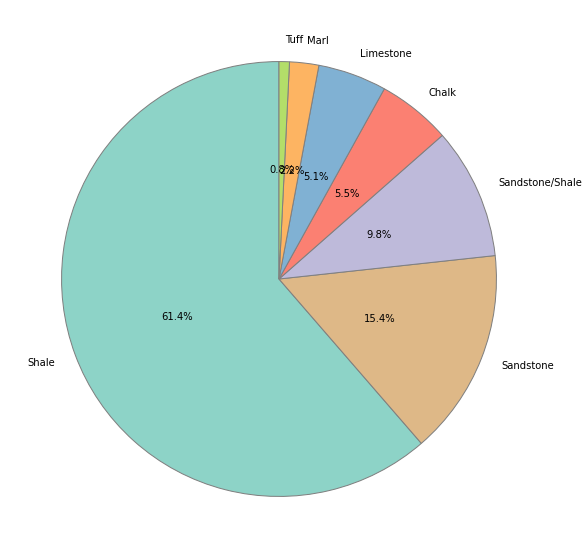

In [6]:
lith_labels = lith_data_df['LITH'].unique()

plt.figure(figsize=(10,10))

pie_chart = plt.pie(lith_data_df['PERCENTAGE'], 
                    labels = lith_labels, 
                    colors=colours,
                    startangle=90,
                    autopct='%0.1f%%',  
                    wedgeprops={"linewidth": 1, "edgecolor": "grey"},
                    pctdistance=0.5)

plt.show()

# 1. Donut Chart

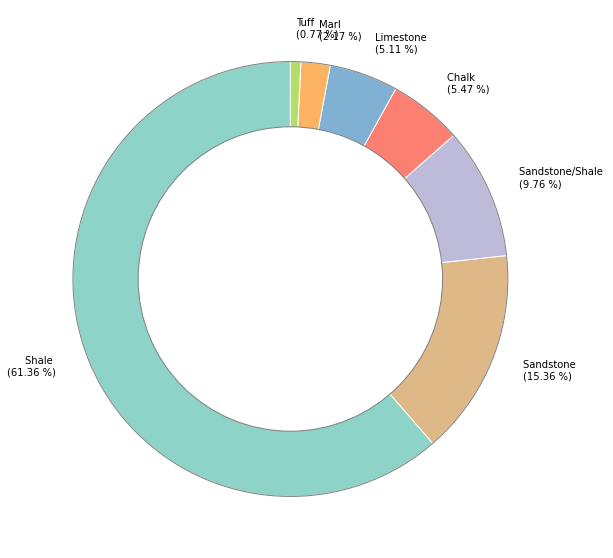

In [7]:
# Set up the plot labels
plot_labels = [f'{i} \n({str(j)} %)' for i,j in zip(lith_data_df.LITH, 
                                                    lith_data_df.PERCENTAGE)]

plt.figure(figsize=(10,10))
plt.pie(lith_data_df['PERCENTAGE'], 
        labels = plot_labels,
        colors=colours, 
        startangle=90, 
        wedgeprops={"linewidth": 1, "edgecolor": "white"}, 
        labeldistance=1.15)

# Add inner circle and outer border to the donut chart
# Allows us to have white seperations between the segments
centre_circle = plt.Circle((0, 0), 0.70, fc='white', ec='grey')
outer_circle = plt.Circle((0, 0), 1.00, fc='None', ec='grey')
fig = plt.gcf()

# Adding the circles to the chart
fig.gca().add_artist(centre_circle)
fig.gca().add_artist(outer_circle)

plt.show()

# 2. Bar Charts

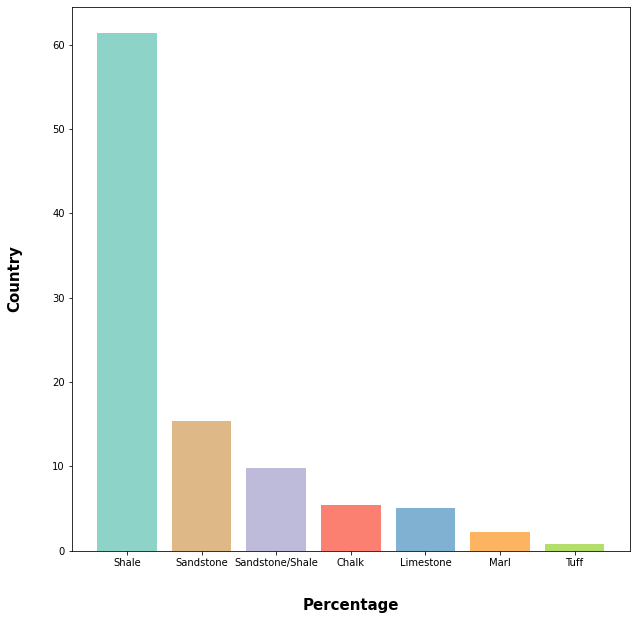

In [8]:
plt.figure(figsize=(10,10))
plt.bar(x=lith_data_df['LITH'], height=lith_data_df['PERCENTAGE'], color=colours)
plt.xlabel('Percentage', fontsize='15', fontweight='bold', labelpad=30)
plt.ylabel('Country', fontsize='15', fontweight='bold', labelpad=30)
plt.show()

# 3. Stacked Bar Charts

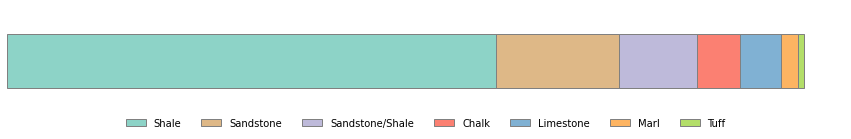

In [9]:
lith_data_df[['PERCENTAGE']].T.plot.barh(stacked=True, 
                                       legend=True, figsize=(15,2), 
                                        color=colours, edgecolor='grey')

plt.axis('off')
plt.legend(lith_data_df['LITH'].unique(), loc='lower center', 
           ncol = 7, bbox_to_anchor=(0.5, -0.2), frameon=False)
plt.show()

# 4. Lolipop Chart

<ipython-input-10-b24211fefaa1>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(lith_data_df['PERCENTAGE'])


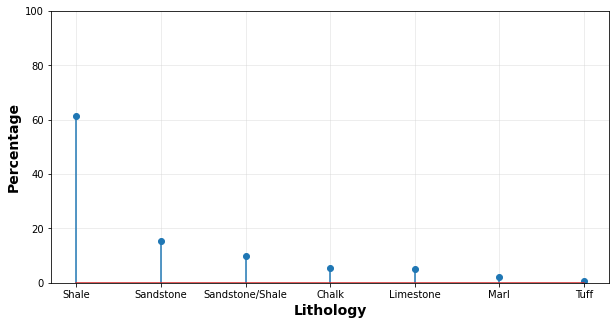

In [10]:
plt.figure(figsize=(10,5))
plt.stem(lith_data_df['PERCENTAGE'])

plt.grid(color='lightgrey', alpha=0.5)
plt.xticks(ticks=range(0,len(lith_data_df)), labels=lith_data_df['LITH'])
plt.xlabel('Lithology', fontsize=14, fontweight='bold')

plt.ylim(0, 100)
plt.ylabel('Percentage', fontsize=14, fontweight='bold')

plt.show()

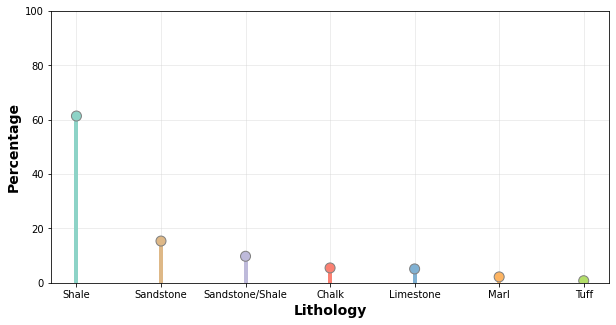

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(lith_data_df['LITH'], lith_data_df['PERCENTAGE'], 
            c=colours, s=100, edgecolors='grey', zorder=3)

plt.vlines(lith_data_df['LITH'], ymin=0, ymax=lith_data_df['PERCENTAGE'], 
           colors=colours, linewidth=4, zorder=2)

plt.ylim(0, 100)
plt.ylabel('Percentage', fontsize=14, fontweight='bold')
plt.xlabel('Lithology', fontsize=14, fontweight='bold')
plt.grid(color='lightgrey', alpha=0.5, zorder=1)

plt.show()

# 5. Radar Chart

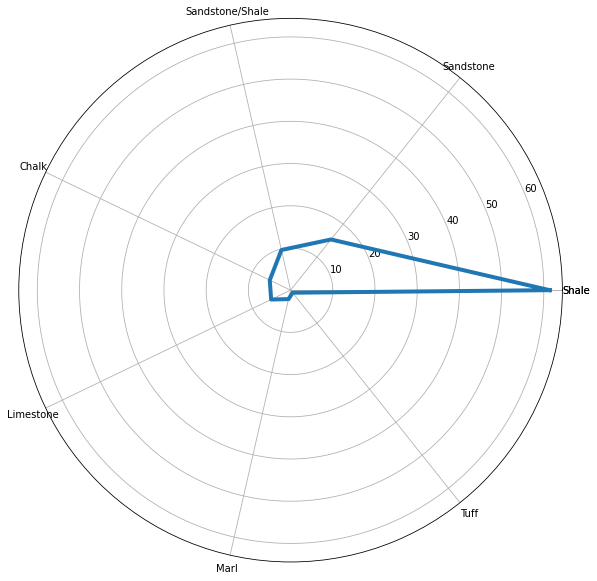

In [12]:
lithologies = list(lith_data_df['LITH'])
percentages = list(lith_data_df['PERCENTAGE'])

lithologies = [*lithologies, lithologies[0]]
percentages = [*percentages, percentages[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(lithologies))


plt.figure(figsize=(10,10))
plt.subplot(polar=True)
plt.plot(label_loc, percentages, lw=4)

lines, labels = plt.thetagrids(np.degrees(label_loc), labels=lithologies)

plt.plot()
plt.show()

In [13]:
import plotly.express as px
fig = px.line_polar(lith_data_df, 
                    r='PERCENTAGE',
                    theta='LITH', 
                    line_close=True,
                    width=800,
                    height=800)

fig.update_traces(fill='toself', line = dict(color='red'))
fig.show()

# 6. Radial Bar Chart

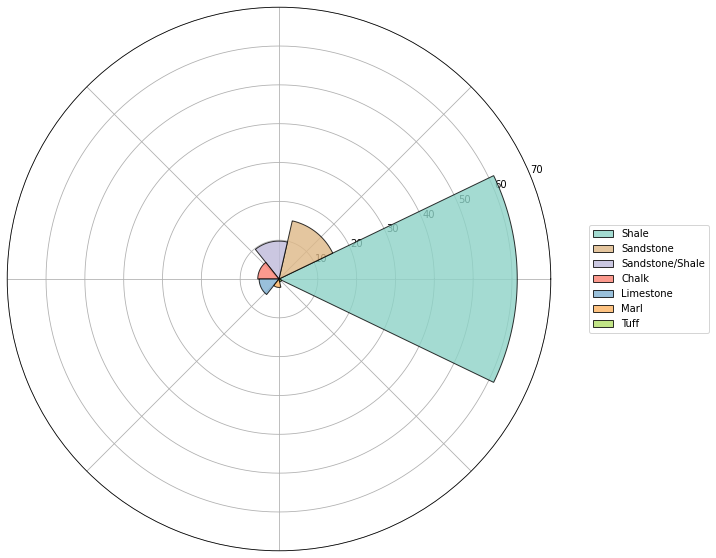

In [15]:
labels = lith_data_df['LITH'].unique()

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10,10))

angles = np.linspace(0, 2*np.pi, len(lith_data_df), endpoint=False)


upper_limit = 100
lower_limit = 0

max_value = lith_data_df['PERCENTAGE'].max()

indexes = list(range(0, len(lith_data_df)))
width = 2*np.pi / len(lith_data_df)
angles = [element * width for element in indexes]


# Create the bars
bars = ax.bar(x = angles, height=lith_data_df['PERCENTAGE'], width=width, 
       color=colours, edgecolor='black', zorder=2, alpha=0.8)

plt.grid(zorder=0)

# Remove all ticks and labels from x & y axis but keep border on
plt.tick_params(axis='x', which='both', bottom=False, left=False, 
               labelbottom=False, labelleft=False)

# Control the scale of the circle
plt.ylim(0, 70)

ax.legend(bars, labels, loc='center right', bbox_to_anchor=(1.3, 0.5))

plt.show()

# 7. Treemaps

In [17]:
pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


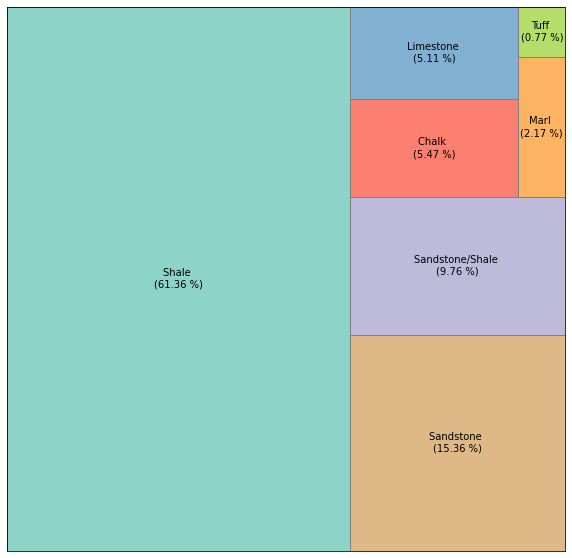

In [18]:
import squarify

# Set up the plot labels
plot_labels = [f'{i} \n({str(j)} %)' for i,j in zip(lith_data_df.LITH, 
                                                    lith_data_df.PERCENTAGE)]

plt.figure(figsize=(10,10))

squarify.plot(sizes=lith_data_df['PERCENTAGE'], 
              label=plot_labels, color=colours, edgecolor='grey')

# Remove all ticks and labels from x & y axis, but keep border on
plt.tick_params(axis='both', which='both', bottom=False, left=False, 
               labelbottom=False, labelleft=False)
plt.show()

# 8. Packed Circle Chart / Circular Treemap

In [21]:
pip install circlify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


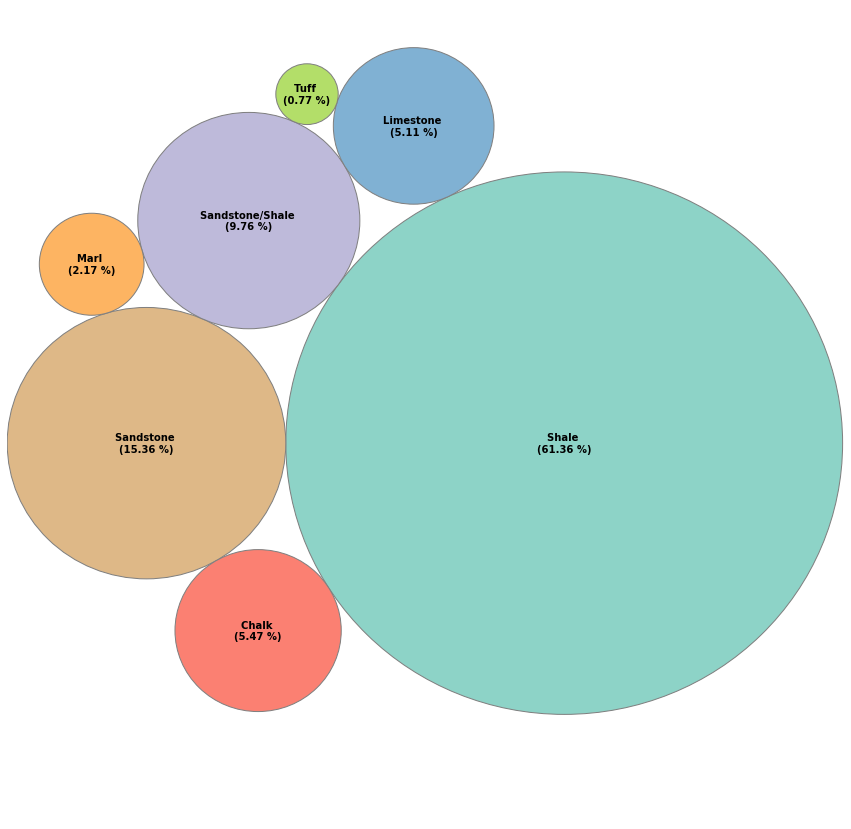

In [22]:
import circlify

colours = ['#8dd3c7', 'burlywood', '#bebada', '#fb8072', 
           '#80b1d3', '#fdb462', '#b3de69']
plot_labels = [f'{i} \n({str(j)} %)' for i,j in zip(lith_data_df.LITH, 
                                                    lith_data_df.PERCENTAGE)]
circle_plot = circlify.circlify(lith_data_df['PERCENTAGE'].tolist(), 
                               target_enclosure=circlify.Circle(x=0, y=0))

# Note that circle_plot starts from the smallest to the largest, 
# so we have to reverse the list
circle_plot.reverse()
fig, axs = plt.subplots(figsize=(15, 15))
# Find axis boundaries
lim = max(max(abs(circle.x) + circle.r, 
              abs(circle.y) + circle.r,) 
          for circle in circle_plot)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
# Display circles.
for circle, colour, label in zip(circle_plot, colours, plot_labels):
    x, y, r = circle
    axs.add_patch(plt.Circle((x, y), r, linewidth=1, facecolor=colour, 
                             edgecolor='grey'))
    plt.annotate(label, (x, y), va='center', ha='center', fontweight='bold')
plt.axis('off')
plt.show()

# 9. Waffle Chart

In [24]:
!pip install pywaffle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 13.8 MB/s eta 0:00:00


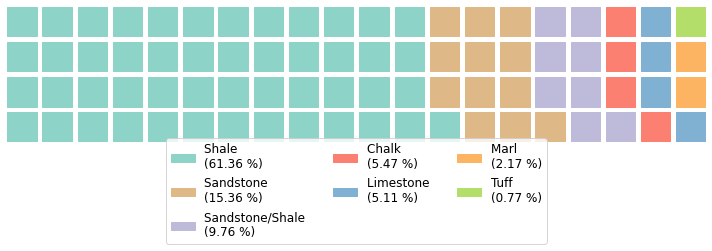

In [25]:
from pywaffle import Waffle

fig = plt.figure(FigureClass=Waffle, figsize=(10,10), rows=4, columns = 20, 
                 values=list(lith_data_df['PERCENTAGE']),
                 colors=colours,
                 labels=plot_labels, 
                legend={'loc':'lower center', 'bbox_to_anchor': (0.5, -0.8), 
                        'ncol':3, 'fontsize':12})
plt.show()

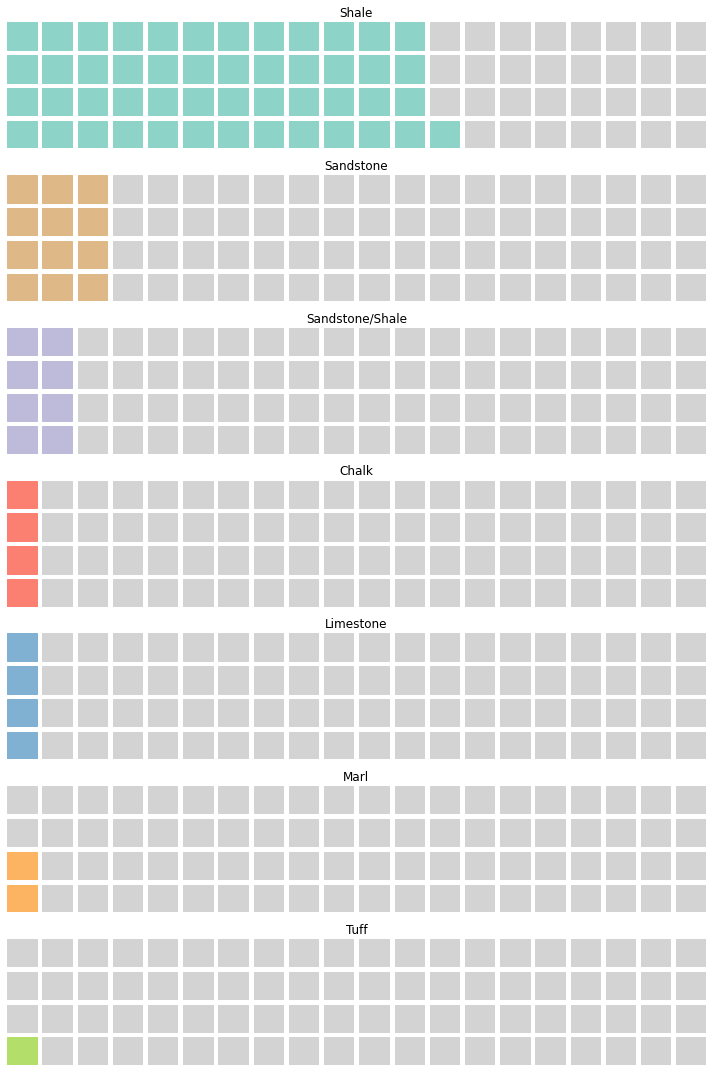

In [26]:
off_colour = 'lightgrey'

# Figsize numbers must be equal or the height greater than the width
# othewise the plot will appear distorted

fig, axs = plt.subplots(len(lith_data_df), 1, figsize=(10, 15))

for (i, ax), color in zip(enumerate(axs.flatten()), colours):
    plot_colours = [color, off_colour]
    perc = lith_data_df.iloc[i]['PERCENTAGE']
    values = [perc, (100-perc)]
    lith = lith_data_df.iloc[i]['LITH']
    Waffle.make_waffle(ax=ax, rows=4, columns=20, 
                       values=values, colors=plot_colours)
    
    ax.set_title(lith)
plt.tight_layout()
plt.show()